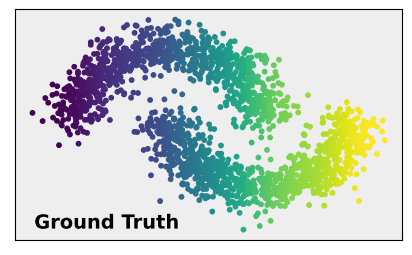

In [5]:
from util import moon
from matplotlib import pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

n = 2000

x,y = moon(n)
c = x[:, 0].argsort().argsort()
fig, ax = plt.figure(figsize=(5, 3)), plt.gca()
ax.scatter(x[:, 0], x[:, 1], c=c, s=10, rasterized=True)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('#eeeeee')
txt = ax.text(0.05, 0.05, 'Ground Truth', color='k', fontsize=14, weight='bold', transform=ax.transAxes)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='#eeeeee')])
plt.savefig("./imgs/ground_truth.png")

In [6]:
import torch
import numpy as np
from sklearn.metrics import pairwise_distances
epsilon = 0.5

n_train = int(n * 0.7)
train_ind = torch.randperm(n)[:n_train]
test_ind = torch.LongTensor(list(set(np.arange(n)) - set(train_ind.tolist())))
D = pairwise_distances(x)
fr, to = np.where(D < epsilon)
edges = list(zip(fr, to))

edge_index = np.vstack([fr, to])
edge_index = torch.tensor(edge_index, dtype=torch.long)
len(edges), edge_index.shape

(570860, torch.Size([2, 570860]))

Data(x=[2000, 2], edge_index=[2, 570860], y=2000)


Epoch 100, Loss: 0.5501905083656311: 100%|██████████| 100/100 [00:38<00:00,  2.57it/s]


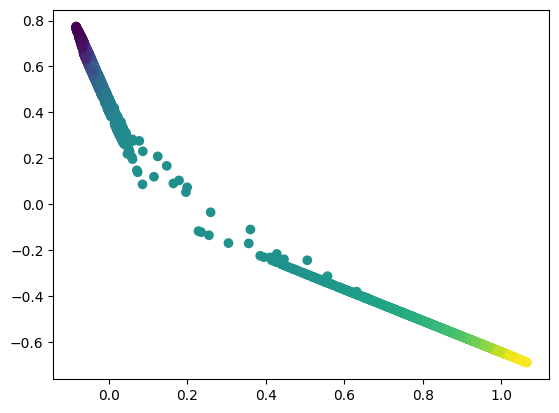

In [7]:
import torch
import torch.optim as optim
from torch_geometric.data import Data
from tqdm.auto import tqdm
from scipy.linalg import orthogonal_procrustes
import matplotlib.pyplot as plt
from util import GIN, GAT, dG, moon

# Generate data
n = 2000  # Specify the number of samples
X, y = moon(n)
x = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)



# Generate edges (assuming edges are defined somewhere)
edges = torch.tensor(edges, dtype=torch.long).t().contiguous()

# Create Data object
data = Data(x=x, y=y, edge_index=edges)
print(data)

# Initialize model and optimizer
m = 200
net = GIN(m)
optimizer = optim.Adam(net.parameters(), lr=0.001)
net.train()

# Training loop
pbar = tqdm(range(100))

for epoch in pbar:
    ind = torch.eye(n)[:, torch.randperm(n)[:m]]
    X_extended = torch.hstack([x, ind])  # Convert X to tensor
    data = Data(x=X_extended, edge_index=edges)
    rec = net(data)  # reconstruct
    loss = dG(x[train_ind], rec[train_ind])  # train loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    pbar.set_description(f'Epoch {epoch + 1}, Loss: {float(loss)}')

# Orthogonal Procrustes and visualization
R, _ = orthogonal_procrustes(x.numpy(), rec.detach().numpy())
rec_GIN = rec.detach().numpy() @ R.T
loss_GIN = float(dG(x, rec))
c = rec_GIN[:, 0].argsort().argsort()

plt.scatter(rec_GIN[:, 0], rec_GIN[:, 1], c=c)
plt.show()
# rec_GAT.shape


Data(x=[2000, 2], edge_index=[2, 570860], y=2000)


Epoch 100, Loss: 0.5545715093612671: 100%|██████████| 100/100 [00:33<00:00,  2.97it/s]


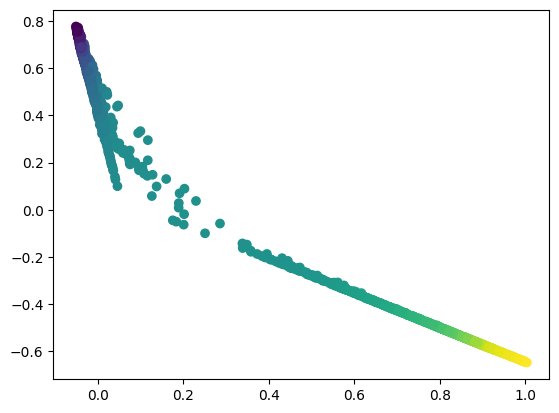

In [8]:
import torch
import torch.optim as optim
from torch_geometric.data import Data
from tqdm.auto import tqdm
from scipy.linalg import orthogonal_procrustes
import matplotlib.pyplot as plt
from util import GIN, GAT, dG, moon

# Generate data
n = 2000  # Specify the number of samples
X, y = moon(n)
x = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)

# Generate edges (assuming edges are defined somewhere)
# edges = torch.tensor(edges, dtype=torch.long).t().contiguous()

# Create Data object
data = Data(x=x, y=y, edge_index=edges)
print(data)

# Initialize model and optimizer
m = 0
net = GIN(m)
optimizer = optim.Adam(net.parameters(), lr=0.001)
net.train()

# Training loop
pbar = tqdm(range(100))

for epoch in pbar:
    # ind = torch.eye(n)[:, torch.randperm(n)[:m]]
    # X_extended = torch.hstack([x, ind])  # Convert X to tensor
    data = Data(x=x, edge_index=edges)
    rec = net(data)  # reconstruct
    loss = dG(x[train_ind], rec[train_ind])  # train loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    pbar.set_description(f'Epoch {epoch + 1}, Loss: {float(loss)}')

# Orthogonal Procrustes and visualization
R, _ = orthogonal_procrustes(x.numpy(), rec.detach().numpy())
rec_GIN = rec.detach().numpy() @ R.T
loss_GIN = float(dG(x, rec))
c = rec_GIN[:, 0].argsort().argsort()

plt.scatter(rec_GIN[:, 0], rec_GIN[:, 1], c=c)
plt.show()
# rec_GAT.shape
